# Time Series Analysis of Wine Sales data Using LSTM

* We need to forecast 12 months of wine sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
df=pd.read_csv('winedata.csv',index_col='DATE',parse_dates=True)

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [81]:
df.tail()

,Sales
DATE,
2022-10-01,15480
2022-11-01,16718
2022-12-01,18001
2023-01-01,12201
2023-02-01,13548


In [4]:
df.columns=['Sales']

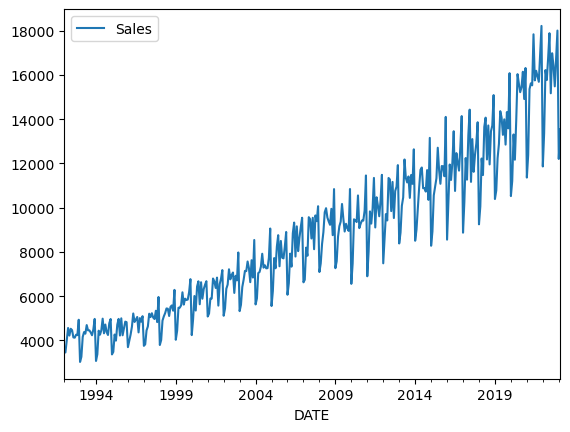

In [6]:
df.plot();

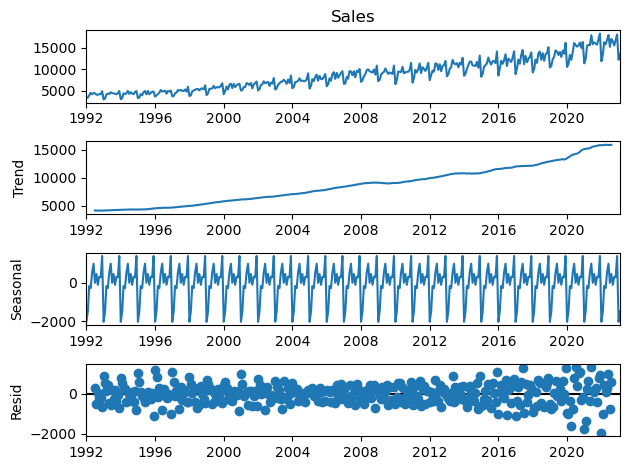

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
results= seasonal_decompose(df['Sales'])
results.plot();

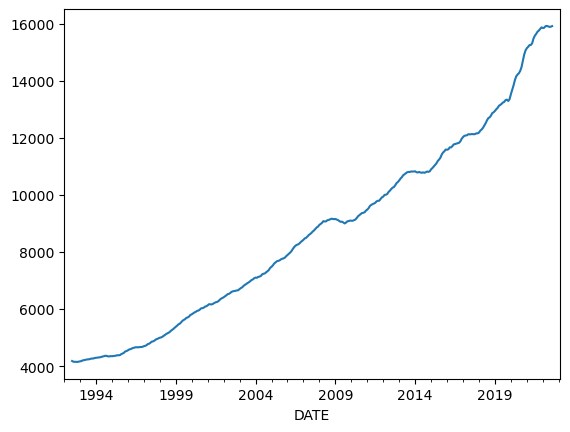

In [24]:
results.trend.plot();

In [25]:
df.size-12

362

In [26]:
df.size

374

In [27]:
train=df.iloc[:362]
test=df.iloc[362:]

In [28]:
train

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2021-10-01,15687
2021-11-01,16909
2021-12-01,18211


In [29]:
test.size

12

In [30]:
test

,Sales
DATE,
2022-03-01,16216
2022-04-01,15766
2022-05-01,16755
2022-06-01,17882
2022-07-01,15168
2022-08-01,16977
2022-09-01,16430
2022-10-01,15480
2022-11-01,16718


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [32]:
scaler.fit(train)

MinMaxScaler()

In [33]:
scaled_train=scaler.transform(train)

In [34]:
scaled_train[:5]

array([[0.02819499],
       [0.02812912],
       [0.06396574],
       [0.10098814],
       [0.07839262]])

In [35]:
scaled_train.max(),scaled_train.min()

(1.0, 0.0)

In [36]:
scaled_test=scaler.transform(test)

scaled_test.max(),scaled_test.min()

(0.9861660079051382, 0.6040843214756257)

In [37]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [38]:
scaled_train[:5]

array([[0.02819499],
       [0.02812912],
       [0.06396574],
       [0.10098814],
       [0.07839262]])

In [39]:
n_input=2
n_features=1

In [40]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [41]:
generator[0]

(array([[[0.02819499],
         [0.02812912]]]),
 array([[0.06396574]]))

In [42]:
X,y=generator[0]

In [43]:
X

array([[[0.02819499],
        [0.02812912]]])

In [44]:
y

array([[0.06396574]])

In [45]:
len(scaled_train)

362

In [46]:
len(generator)

360

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [48]:
n_input=12
n_features=1
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [49]:
X.shape

(1, 2, 1)

In [50]:
model=Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [52]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)

In [53]:
model.fit(train_generator,epochs=200,callbacks=[callback])

Epoch 1/200
350/350 [==============================] - 3s 5ms/step - loss: 0.0117
Epoch 2/200
350/350 [==============================] - 2s 5ms/step - loss: 0.0075
Epoch 3/200
350/350 [==============================] - 2s 5ms/step - loss: 0.0061
Epoch 4/200
350/350 [==============================] - 2s 6ms/step - loss: 0.0058
Epoch 5/200
350/350 [==============================] - 2s 6ms/step - loss: 0.0045
Epoch 6/200
350/350 [==============================] - 2s 6ms/step - loss: 0.0037
Epoch 7/200
350/350 [==============================] - 4s 11ms/step - loss: 0.0029
Epoch 8/200
350/350 [==============================] - 6s 17ms/step - loss: 0.0025
Epoch 9/200
350/350 [==============================] - 8s 22ms/step - loss: 0.0025
Epoch 10/200
350/350 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 11/200
350/350 [==============================] - 2s 5ms/step - loss: 0.0020
Epoch 12/200
350/350 [==============================] - 2s 5ms/step - loss: 0.0018
Epoch 13/2

In [54]:
model.history.history.keys()

dict_keys(['loss'])

In [55]:
model.history.history['loss']

[0.011650064960122108,
 0.0074645644053816795,
 0.0060730441473424435,
 0.005787287373095751,
 0.004477171692997217,
 0.0036891940981149673,
 0.002935676835477352,
 0.0025346374604851007,
 0.0024946231860667467,
 0.002133938716724515,
 0.0020285628270357847,
 0.001795775257050991,
 0.0016983222449198365,
 0.0019517840119078755,
 0.0017222901806235313,
 0.0014936805237084627,
 0.0015406932216137648,
 0.0016381056047976017,
 0.0015165015356615186,
 0.0015144562348723412,
 0.0015311423921957612]

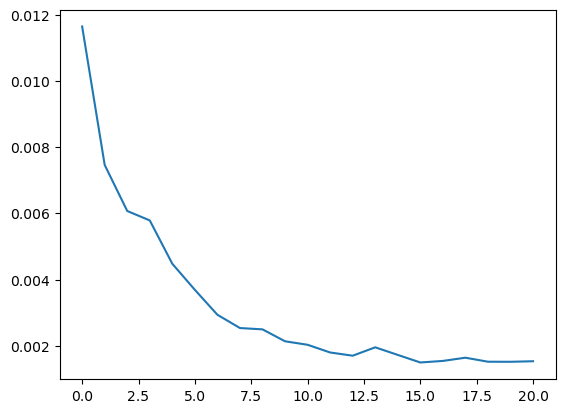

In [56]:
my_loss=model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [41]:
#last 12 of train will give ----->>>>> 1 of the test

In [57]:
first_eval_batch=scaled_train[-12:]
print(first_eval_batch)

[[0.81179183]
 [0.82911726]
 [0.82318841]
 [0.97503294]
 [0.83794466]
 [0.86653491]
 [0.85065876]
 [0.83372859]
 [0.91422925]
 [1.        ]
 [0.58175231]
 [0.68030303]]


In [58]:
X_train,y_train=train_generator[0]

In [59]:
X_train.shape

(1, 12, 1)

In [60]:
# so reshape the first_eval_batch with the same shape
first_eval_batch.shape

(12, 1)

In [61]:
first_eval_batch=first_eval_batch.reshape(1,n_input,n_features)

In [62]:
first_eval_batch.shape

(1, 12, 1)

In [63]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 235ms/step


array([[0.87297636]], dtype=float32)

In [64]:
model.predict(first_eval_batch)[0]

1/1 [==============================] - 0s 32ms/step


array([0.87297636], dtype=float32)

# Forecast the model with unknown data

In [65]:
first_eval_batch

array([[[0.81179183],
        [0.82911726],
        [0.82318841],
        [0.97503294],
        [0.83794466],
        [0.86653491],
        [0.85065876],
        [0.83372859],
        [0.91422925],
        [1.        ],
        [0.58175231],
        [0.68030303]]])

In [66]:
first_eval_batch[:,1:,:]

array([[[0.82911726],
        [0.82318841],
        [0.97503294],
        [0.83794466],
        [0.86653491],
        [0.85065876],
        [0.83372859],
        [0.91422925],
        [1.        ],
        [0.58175231],
        [0.68030303]]])

In [67]:
first_eval_batch[:,1:,:].shape

(1, 11, 1)

In [56]:
[[model.predict(first_eval_batch)[0]]]

1/1 [==============================] - 0s 61ms/step


[[array([0.8930104], dtype=float32)]]

**Since the shape update occurs at axis 1 i.e if we append predcted value in axis 1 then shape of first_eval_batch[:,1:,:] will become (1,12,1)**

In [68]:
my_pred=[]


first_eval_batch=scaled_train[-n_input:]

current_batch=first_eval_batch.reshape(1,n_input,n_features)
current_batch

array([[[0.81179183],
        [0.82911726],
        [0.82318841],
        [0.97503294],
        [0.83794466],
        [0.86653491],
        [0.85065876],
        [0.83372859],
        [0.91422925],
        [1.        ],
        [0.58175231],
        [0.68030303]]])

In [69]:
pred=model.predict(current_batch)[0]

1/1 [==============================] - 0s 33ms/step


In [70]:
pred

array([0.87297636], dtype=float32)

In [71]:
current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)
current_batch

array([[[0.82911726],
        [0.82318841],
        [0.97503294],
        [0.83794466],
        [0.86653491],
        [0.85065876],
        [0.83372859],
        [0.91422925],
        [1.        ],
        [0.58175231],
        [0.68030303],
        [0.87297636]]])

In [72]:
my_pred=[]


first_eval_batch=scaled_train[-n_input:]

current_batch=first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
    pred=model.predict(current_batch)[0]
    my_pred.append(pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [73]:
my_pred

[array([0.87297636], dtype=float32),
 array([0.8903126], dtype=float32),
 array([0.8960701], dtype=float32),
 array([1.0344255], dtype=float32),
 array([0.9048618], dtype=float32),
 array([0.9343672], dtype=float32),
 array([0.91696733], dtype=float32),
 array([0.9072701], dtype=float32),
 array([0.9876212], dtype=float32),
 array([1.0577012], dtype=float32),
 array([0.65755224], dtype=float32),
 array([0.7655431], dtype=float32)]

In [74]:
my_pred=scaler.inverse_transform(my_pred)
my_pred

array([[16282.78118587],
       [16545.94545102],
       [16633.34446287],
       [18733.5790453 ],
       [16766.80224276],
       [17214.69379044],
       [16950.56410527],
       [16803.35972166],
       [18023.08963633],
       [19086.90467215],
       [13012.6430378 ],
       [14651.94430685]])

In [75]:
test

,Sales
DATE,
2022-03-01,16216
2022-04-01,15766
2022-05-01,16755
2022-06-01,17882
2022-07-01,15168
2022-08-01,16977
2022-09-01,16430
2022-10-01,15480
2022-11-01,16718


In [76]:
test['prediction']=my_pred
test

C:\Users\Ubaid Shah\AppData\Local\Temp\ipykernel_15420\778851991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=my_pred


,Sales,prediction
DATE,,
2022-03-01,16216,16282.781186
2022-04-01,15766,16545.945451
2022-05-01,16755,16633.344463
2022-06-01,17882,18733.579045
2022-07-01,15168,16766.802243
2022-08-01,16977,17214.693790
2022-09-01,16430,16950.564105
2022-10-01,15480,16803.359722
2022-11-01,16718,18023.089636


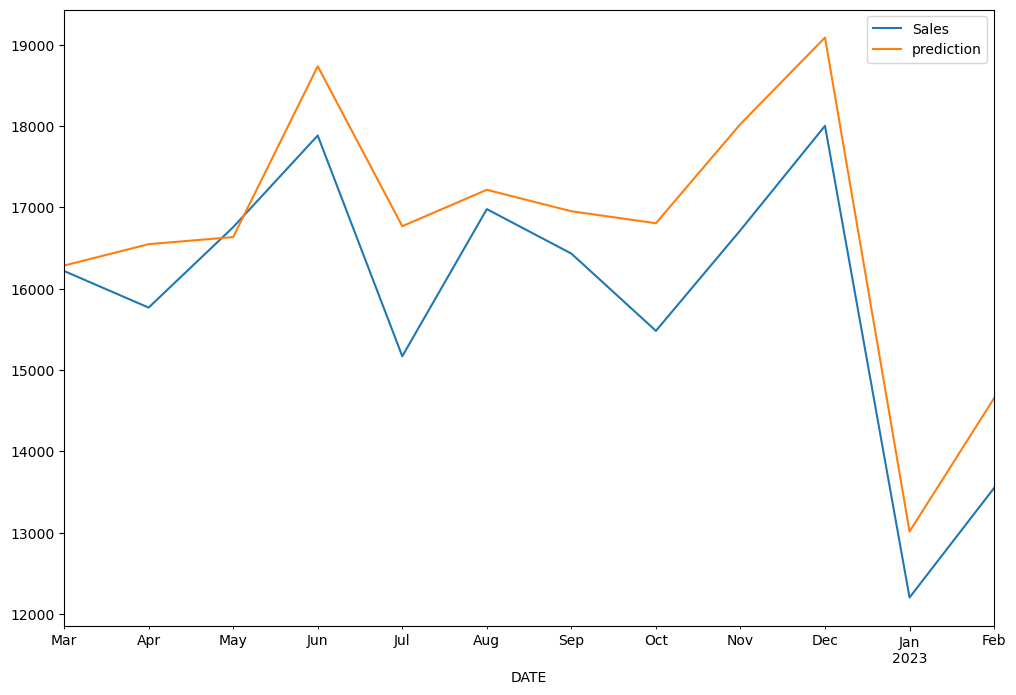

In [77]:
test.plot(figsize=(12,8))
plt.show()

In [78]:
test.columns=['sales','predictions']

In [79]:
test['%error']=np.round((test['sales']-test['predictions'])*100/test['sales'],2)

C:\Users\Ubaid Shah\AppData\Local\Temp\ipykernel_15420\871373395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['%error']=np.round((test['sales']-test['predictions'])*100/test['sales'],2)


In [80]:
test

,sales,predictions,%error
DATE,,,
2022-03-01,16216,16282.781186,-0.41
2022-04-01,15766,16545.945451,-4.95
2022-05-01,16755,16633.344463,0.73
2022-06-01,17882,18733.579045,-4.76
2022-07-01,15168,16766.802243,-10.54
2022-08-01,16977,17214.693790,-1.40
2022-09-01,16430,16950.564105,-3.17
2022-10-01,15480,16803.359722,-8.55
2022-11-01,16718,18023.089636,-7.81


In [78]:
model.save('lstm.h5')

In [79]:
from keras.models import load_model
new_model=load_model('lstm.h5')

In [80]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
